# T016 · Protein-ligand interactions

Authors:

- Jaime Rodríguez-Guerra, [Volkamer lab](https://volkamerlab.org)
- Michele Wichmann, 2019-2020, Charité/FU Berlin
- Yonghui Chen, [Volkamer lab](https://volkamerlab.org)
- Talia B. Kimber, [Volkamer lab](https://volkamerlab.org)
- Andrea Volkamer, [Volkamer lab](https://volkamerlab.org)

## Aim of this talktorial

In this talktorial, we focus on protein-ligand interactions. Understanding such interactions, which are driving molecular recognition, are fundamental in drug design.

To this end, we use two Python tools: the first one, called the Protein–Ligand Interaction Profiler, or [PLIP](https://doi.org/10.1093/nar/gkv315), to get insight into protein-ligand interactions for any sample complex and the second, [NGLView](https://doi.org/10.1093/bioinformatics/btx789), to visualize the interactions in 3D.

### Contents in _Theory_

- Protein-ligand interactions
- PLIP: Protein–Ligand Interaction Profiler
    - Web service
    - Algorithm
- Visualization: complex and interactions

### Contents in _Practical_

- PDB complex: example with EGFR
- Profiling protein-ligand interactions using PLIP
- Table of interaction types
- Visualization with NGLView
    - Analysis of interactions

### References

- Review on protein-ligand interactions ([_Int. J. Mol. Sci._ (2016), __17__, 144](https://www.mdpi.com/1422-0067/17/2/144))
- A systematic analysis of non-covalent interactions in the PDB database ([_M. Med. Chem. Commun._ (2017), __8__, 1970-1981](https://pubs.rsc.org/en/content/articlelanding/2017/md/c7md00381a#!divAbstract))
- A chapter about how protein–ligand interactions are key for drug action (in [Klebe G. (eds) Drug Design. Springer, Berlin, Heidelberg.](https://link.springer.com/referenceworkentry/10.1007%2F978-3-642-17907-5_4))
* NGLView, the interactive visualizer for Jupyter notebooks ([_Bioinformatics_ (2018), __34__, 1241–124](https://doi.org/10.1093/bioinformatics/btx789))
* PLIP, the Protein–Ligand Interaction Profiler ([_Nucl. Acids Res._ (2015), __43__, W1, W443-W447](https://academic.oup.com/nar/article/43/W1/W443/2467865))

## Theory

### Protein-ligand interactions

Ligand binding is mainly governed by non-covalent interactions between the ligand and the surface of the protein pocket or protein-protein interface. This process is a function of electrostatic and shape complementarities, induces fitting, desolvation processes and more.

Some quotes from the literature:

Adapted from [José L. Medina-Franco, Oscar Méndez-Lucio, Karina Martinez-Mayorga](https://www.sciencedirect.com/science/article/pii/S1876162314000029):

> Understanding protein–ligand interactions (PLIs) and protein–protein interactions (PPIs) is at the core of molecular recognition and has a fundamental role in many scientific areas. PLIs and PPIs have a broad area of practical applications in drug discovery including but not limited to molecular docking, structure-based design, virtual screening of molecular fragments, small molecules, and other types of compounds, clustering of complexes, and structural interpretation of activity cliffs, to name a few.

These interactions can be rationalized in several ways, which opens the door to systematic analysis of the docking solutions.

![protein ligand non-covalent interactions](images/protein_ligand_non_covalent.gif)

_Figure 1_ : **Frequency of non-colavent interactions.** Out of 750,873 ligand–protein atom pairs extracted from complexes from the PDB data base, the 100 most frequent pairs can be grouped into seven interaction types, as shown in the figure (taken from the paper by de Freitas, Renato Ferreira, and Matthieu Schapira, [A systematic analysis of atomic protein–ligand interactions in the PDB](https://doi.org/10.1039/C7MD00381A)).

There are several programs to assess protein-ligand interactions in an automated way.

For example, the Kinase-Ligand Interaction Fingerprints and Structures database (KLIFS) is a kinase centric tool with a freely available web service, which can be found on https://klifs.net/.
More details can be found in talktorial 12,  "Data acquisition from KLIFS".

### PLIP: Protein–Ligand Interaction Profiler

For a more general set of proteins, [PLIP](https://plip.biotec.tu-dresden.de/plip-web/plip/index) is also popular thanks to its publicly available webserver and free-to-use Python library.

#### PLIP: web service

The PLIP web service is a freely available tool which allows to exhibit protein-ligand interactions from any PDB structure as shown in the figure below.

![aromatic interaction](images/3POZ_PLIP.png)

_Figure 2_ : **Visualization of protein-ligand interactions generated by the PLIP web service.** The example displays the EGFR kinase in complex, with associated PDB ID [3POZ](http://dx.doi.org/10.2210/pdb3poz/pdb). The figure, a snapshot from the [web service](https://projects.biotec.tu-dresden.de/plip-web/plip/result/895de9d1-7cd9-4d6d-be70-708919c79593), shows

- the 3D plot of the protein and the ligand and the different interactions types (see legend on the right).


- a table describing the hydrophobic interactions between atoms from the protein and the ligand.

#### PLIP: algorithm

For each binding site, the PLIP algorithm considers the atoms from the protein and the ligand only if they lie within a certain distance cutoff, which equals the maximum distance between the centroid of the ligand and a ligand atom. 

Once the atoms from the protein and ligand are identified, non-covalent interactions can be detected, such as:

- hydrophobic interactions
- hydrogen bonds
- aromatic stacking
- pi-cation interactions
- salt bridges
- water-bridged hydrogen bonds
- halogen bonds

They are defined using geometry rules, such as distance and angle thresholds.

The [supporting information](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4489249/bin/supp_gkv315_nar-00254-web-b-2015-File003.pdf) accompanying the manuscript describes protein-ligand interactions in a simple way that is very easy to understand. The PDF document is shown below. 

In [1]:
from teachopencadd.utils import show_pdf

In [2]:
pdf = ("https://www.ncbi.nlm.nih.gov/"
       "pmc/articles/PMC4489249/bin/supp_gkv315_nar-00254-web-b-2015-File003.pdf")
show_pdf(pdf)

### Visualization: complex and interactions

We will use `nglview` for visualization. It's a [web-based molecular viewer](https://doi.org/10.1093/bioinformatics/btx789) that can be run on Jupyter notebooks. We will first use it in a basic way to visualize a complex of interest. And then we will make use of `ipywidgets` layouts to visualize protein-ligand interactions.

## Practical

In [3]:
# imports
from pathlib import Path
from warnings import filterwarnings
import time
import pandas as pd
import nglview as nv
import openbabel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from plip.structure.preparation import PDBComplex
from plip.exchange.report import BindingSiteReport

In [4]:
# Absolute path
HERE = Path(_dh[-1])
DATA = HERE / "data"

### PDB complex: example with EGFR

As a test case for this notebook, we choose the EGFR kinase. The PDB that will be looked into is given by the ID [3POZ](http://dx.doi.org/10.2210/pdb3poz/pdb). Let's use `nglview` to vizualise the structure in a notebook cell.

_Note_: the complex can easily be changed by adapting the PDB ID in the cell below.

In [5]:
pdb_id = "3poz"

In [6]:
# show the complex based on PDB ID
ngl_viewer = nv.show_pdbid(pdb_id)
# Add the ligands
ngl_viewer.add_representation(repr_type="ball+stick",
                              selection="hetero and not water")
# center view on binding site
ngl_viewer.center("ligand")
ngl_viewer

NGLWidget()

In [7]:
ngl_viewer.render_image(trim=True, factor=2, transparent=True);

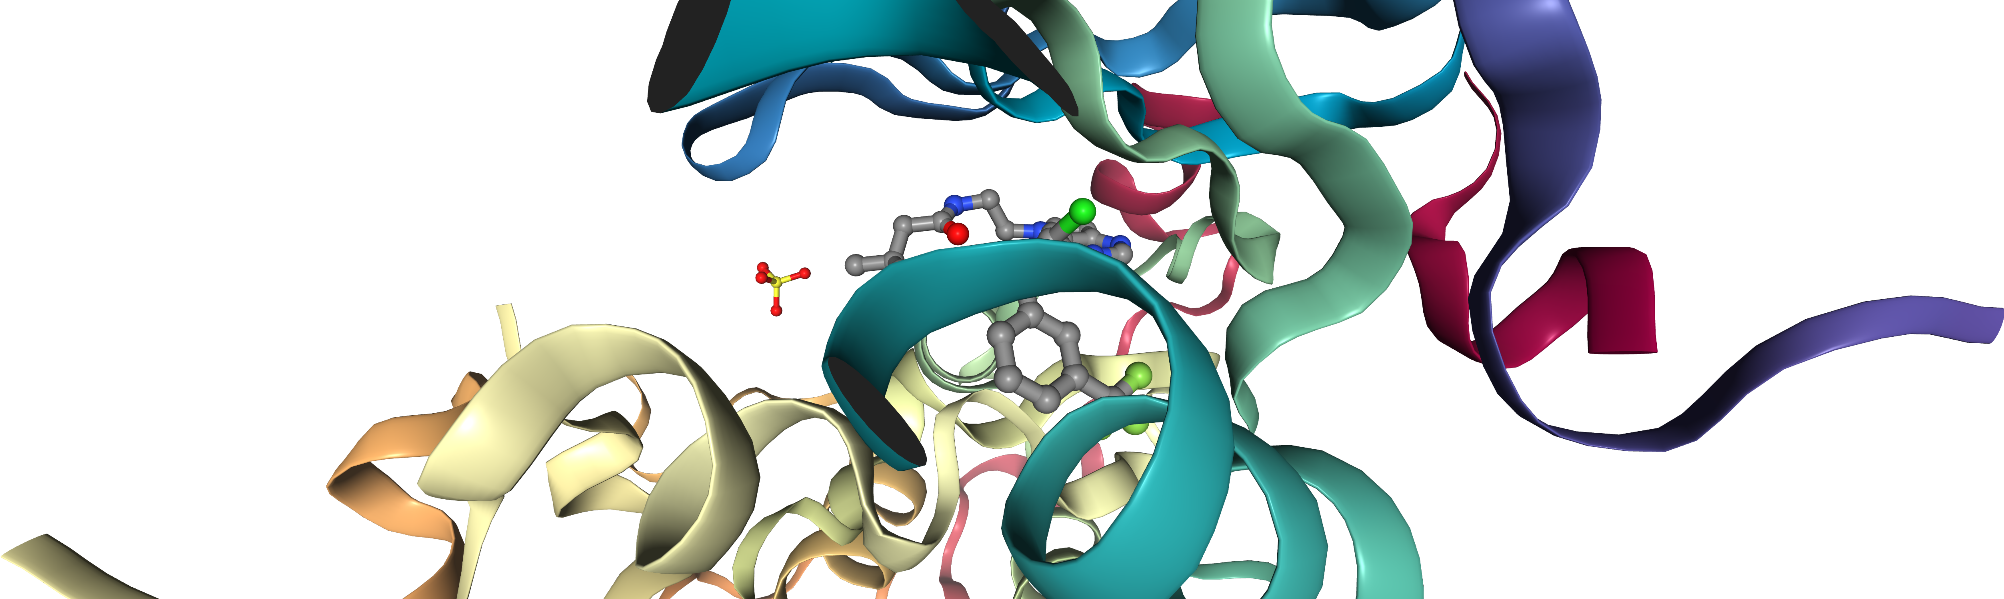

In [8]:
ngl_viewer._display_image()

### Profiling protein-ligand interactions using PLIP

PLIP offers [a webserver](https://projects.biotec.tu-dresden.de/plip-web/plip) for automated analysis, but unfortunately there is no API. We could try to use the HTML forms as if we were using the standard web UI, but since the library itself is Python-3 ready and very easy to install with `pip`, we can just use it locally for simplicity.

PLIP takes PDB files as input, so we can pass the PDB file to PLIP and let it do its magic. The `BindingSiteReport` class processes each detected binding site in `PDBComplex` and creates an object with the (eight) fields we are interested in, namely

- hydrophobic interaction : `hydrophobic`
- hydrogen bond : `hbond`
- water bridge : `waterbridge`
- salt bridge : `saltbridge`
- $\pi$-stacking (parallel and perpendicular) : `pistacking`
- $\pi$- cation : `pication`
- halogen bond : `halogen`
- metal complexation : `metal`


These fields are divided in `<field>_features` (containing column names) and `<field>_info` (containing the actual records). If we iterate over the object retrieving the correct attribute name with `getattr()`, we can compose a dictionary that can be passed to a `pandas.DataFrame` for nice overviews.

This dictionary is composed of two levels:

- First level is the detected binding sites.

- For each binding site, we have one more sub-dictionary containing eight lists, one for each specific interaction. Each list will contain the column names in the first row, and the data (if available) in the following.

In [9]:
def analyze_interactions(pdb_file):
    """
    Retrieves the interactions from PLIP.

    Parameters
    ----------
    pdb_file :
            The PDB file of the complex.

    Returns
    -------
    dict :
            A dictionary of the binding sites and the interactions.
    """
    protlig = PDBComplex()
    protlig.load_pdb(pdb_file)  # load the pdb file
    for ligand in protlig.ligands:
        protlig.characterize_complex(ligand)  # find ligands and analyze interactions
    sites = {}
    for key, site in sorted(protlig.interaction_sets.items()):
        binding_site = BindingSiteReport(site)  # collect data about interactions
        # tuples of *_features and *_info will be converted to pandas data frame
        keys = (
            "hydrophobic",
            "hbond",
            "waterbridge",
            "saltbridge",
            "pistacking",
            "pication",
            "halogen",
            "metal",
        )
        interactions = {
            k: [getattr(binding_site, k + "_features")] + getattr(binding_site, k + "_info")
            for k in keys
        }
        sites[key] = interactions
    return sites

We create the dictionary for the complex of interest:

In [10]:
interactions_by_site = analyze_interactions(f"{DATA}/{pdb_id}.pdb")

Let's see how many binding sites are detected:

In [11]:
print(
        f"Number of binding sites detected in {pdb_id} : \n "
        f"{len(interactions_by_site)}"
     )  # NBVAL_CHECK_OUTPUT

Number of binding sites detected in 3poz : 
 4


### Table of interaction types

We can construct a `pandas.DataFrame` for a binding site and particular interaction type.

In [12]:
def create_df_from_binding_site(binding_site_id,
                                interaction_type="hbond"):
    """
    Creates a data frame from a binding site and interaction type.

    Parameters
    ----------
    binding_site_id : str
        The binding site of interest.
    interaction_type : str
        The interaction type of interest (default set to hydrogen bond).

    Returns
    -------
    DataFrame :
        Data frame with information retrieved from PLIP.
    """
    df = pd.DataFrame.from_records(
        # data is stored AFTER the column names
        interactions_by_site[binding_site_id][interaction_type][1:],
        # column names are always the first element
        columns=interactions_by_site[binding_site_id][interaction_type][0],
    )
    return df

**Hydrophobic interactions**

In the next cell, we show the hydrophobic interactions from the first detected binding site.

In [13]:
create_df_from_binding_site(list(interactions_by_site.keys())[0],
                            interaction_type="hydrophobic")
# NBVAL_CHECK_OUTPUT

,RESNR,RESTYPE,RESCHAIN,RESNR_LIG,RESTYPE_LIG,RESCHAIN_LIG,DIST,LIGCARBONIDX,PROTCARBONIDX,LIGCOO,PROTCOO
0,745,LYS,A,1023,03P,A,3.91,2399,320,"(18.317, 32.25, 10.052)","(20.469, 34.989, 8.267)"
1,788,LEU,A,1023,03P,A,3.66,2384,595,"(18.404, 30.743, 6.486)","(18.317, 33.573, 4.169)"
2,790,THR,A,1023,03P,A,3.80,2398,611,"(16.476, 34.203, 10.862)","(12.875, 33.449, 9.914)"
3,854,THR,A,1023,03P,A,3.82,2383,1138,"(18.135, 32.543, 11.422)","(17.798, 28.992, 12.797)"
4,858,LEU,A,1023,03P,A,3.93,2384,1167,"(18.404, 30.743, 6.486)","(22.084, 30.736, 5.093)"


As you can notice, this table matches the figure in the _Theory_ part of the notebook.

**Hydrogen interactions**

If hydrogen interactions are of interest, the table can be generated as follow:

In [14]:
create_df_from_binding_site(list(interactions_by_site.keys())[0],
                            interaction_type="hbond")
# NBVAL_CHECK_OUTPUT

,RESNR,RESTYPE,RESCHAIN,RESNR_LIG,RESTYPE_LIG,RESCHAIN_LIG,SIDECHAIN,DIST_H-A,DIST_D-A,DON_ANGLE,PROTISDON,DONORIDX,DONORTYPE,ACCEPTORIDX,ACCEPTORTYPE,LIGCOO,PROTCOO
0,793,MET,A,1023,03P,A,False,2.01,2.96,163.57,True,629,Nam,2405,Nar,"(13.371, 34.064, 15.005)","(10.667, 33.654, 16.145)"


**Halogen interactions**

Let's also have a look at halogen interactions:

In [15]:
create_df_from_binding_site(list(interactions_by_site.keys())[0],
                            interaction_type="halogen")
# NBVAL_CHECK_OUTPUT

,RESNR,RESTYPE,RESCHAIN,RESNR_LIG,RESTYPE_LIG,RESCHAIN_LIG,SIDECHAIN,DIST,DON_ANGLE,ACC_ANGLE,DON_IDX,DONORTYPE,ACC_IDX,ACCEPTORTYPE,LIGCOO,PROTCOO
0,766,MET,A,1023,03P,A,False,3.60,167.05,118.86,2390,F,431,O2,"(12.164, 26.835, 3.777)","(14.283, 28.118, 6.395)"
1,788,LEU,A,1023,03P,A,False,3.23,159.67,108.02,2397,Cl,592,O2,"(14.792, 37.053, 6.216)","(15.676, 34.766, 8.319)"
2,790,THR,A,1023,03P,A,True,3.47,171.27,103.84,2389,F,610,O3,"(11.467, 31.629, 9.124)","(13.867, 29.356, 8.056)"


### Visualization with NGLView

Now, let's try to represent those interactions in the NGL viewer. We can draw cylinders between the interaction points (`LIGCOOVisualization with NGLView` and `PROTCOO` in the `pandas.DataFrame`) and color-code them as shown in `color_map`, which uses RGB tuples.

In [16]:
color_map = {
    "hydrophobic": [0.90, 0.10, 0.29],
    "hbond": [0.26, 0.83, 0.96],
    "waterbridge": [1.00, 0.88, 0.10],
    "saltbridge": [0.67, 1.00, 0.76],
    "pistacking": [0.75, 0.94, 0.27],
    "pication": [0.27, 0.60, 0.56],
    "halogen": [0.94, 0.20, 0.90],
    "metal": [0.90, 0.75, 1.00],
}

Let's see what these RGB colors correspond to:

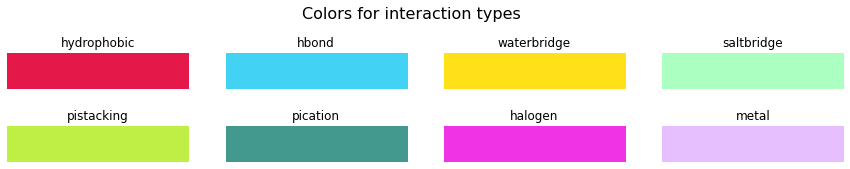

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 2))
plt.subplots_adjust(hspace=1)
fig.suptitle('Colors for interaction types', size=16, y=1.2)

for ax, (interaction, color) in zip(fig.axes, color_map.items()):
    ax.imshow(np.zeros((1, 5)), cmap=colors.ListedColormap(color_map[interaction]))
    ax.set_title(interaction, loc="center")
    ax.set_axis_off()
plt.show()

In [18]:
def show_interactions_3D(pdb_id, binding_site_number=1,
                         highlight_interactions=color_map):
    """
    3D visualization of protein-ligand interactions.

    Parameters
    ----------
    pdb_id : str
        The pdb ID of interest.
    binding_site_number : int
        Which binding site to consider. By default the first one.
    highlight_interactions : dict
        The colors used to highlight the different interaction types.

    Returns
    -------
    NGL viewer with explicit interactions given by PLIP.
    """

    # Create NGLviewer
    viewer = nv.NGLWidget(height="600px", default=True, gui=True)
    # Add protein
    prot_component = viewer.add_pdbid(pdb_id)
    # Add the ligands
    viewer.add_representation(repr_type="ball+stick",
                              selection="hetero and not water")

    # Add interactions from PLIP
    interactions_by_site = analyze_interactions(f"{DATA}/{pdb_id}.pdb")

    # Choose the binding site:
    try:
        binding_site_id = list(interactions_by_site.keys())[binding_site_number-1]
    except IndexError as error:
        print('Not so many sites available. Picking the first one by default')
        binding_site_id = list(interactions_by_site.keys())[0]
    print(f'Considered binding site : {binding_site_id} ')

    interacting_residues = []
    for interaction_type, interaction_list in interactions_by_site[binding_site_id].items():
        color = highlight_interactions[interaction_type]
        if len(interaction_list) == 1:
            continue
        df_interactions = pd.DataFrame.from_records(
            interaction_list[1:], columns=interaction_list[0]
        )
        for _, interaction in df_interactions.iterrows():
            name = interaction_type
            viewer.shape.add_cylinder(
                interaction["LIGCOO"], interaction["PROTCOO"], color, [0.1], name,
            )
            interacting_residues.append(interaction["RESNR"])
    # Display interacting residues
    res_sele = " or ".join([f"({r} and not _H)" for r in interacting_residues])
    res_sele_nc = " or ".join(
        [f"({r} and ((_O) or (_N) or (_S)))" for r in interacting_residues]
    )
    prot_component.add_ball_and_stick(
        sele=res_sele, colorScheme="chainindex", aspectRatio=1.5
    )
    prot_component.add_ball_and_stick(
        sele=res_sele_nc, colorScheme="element", aspectRatio=1.5
    )
    # Center on binding site
    if binding_site_number == 1:
        viewer.center("ligand")
    return viewer

In [19]:
viewer_3D = show_interactions_3D(pdb_id, binding_site_number=1)
viewer_3D

Considered binding site : 03P:A:1023 


NGLWidget()

In [20]:
viewer_3D.render_image(trim=True, factor=2, transparent=True);

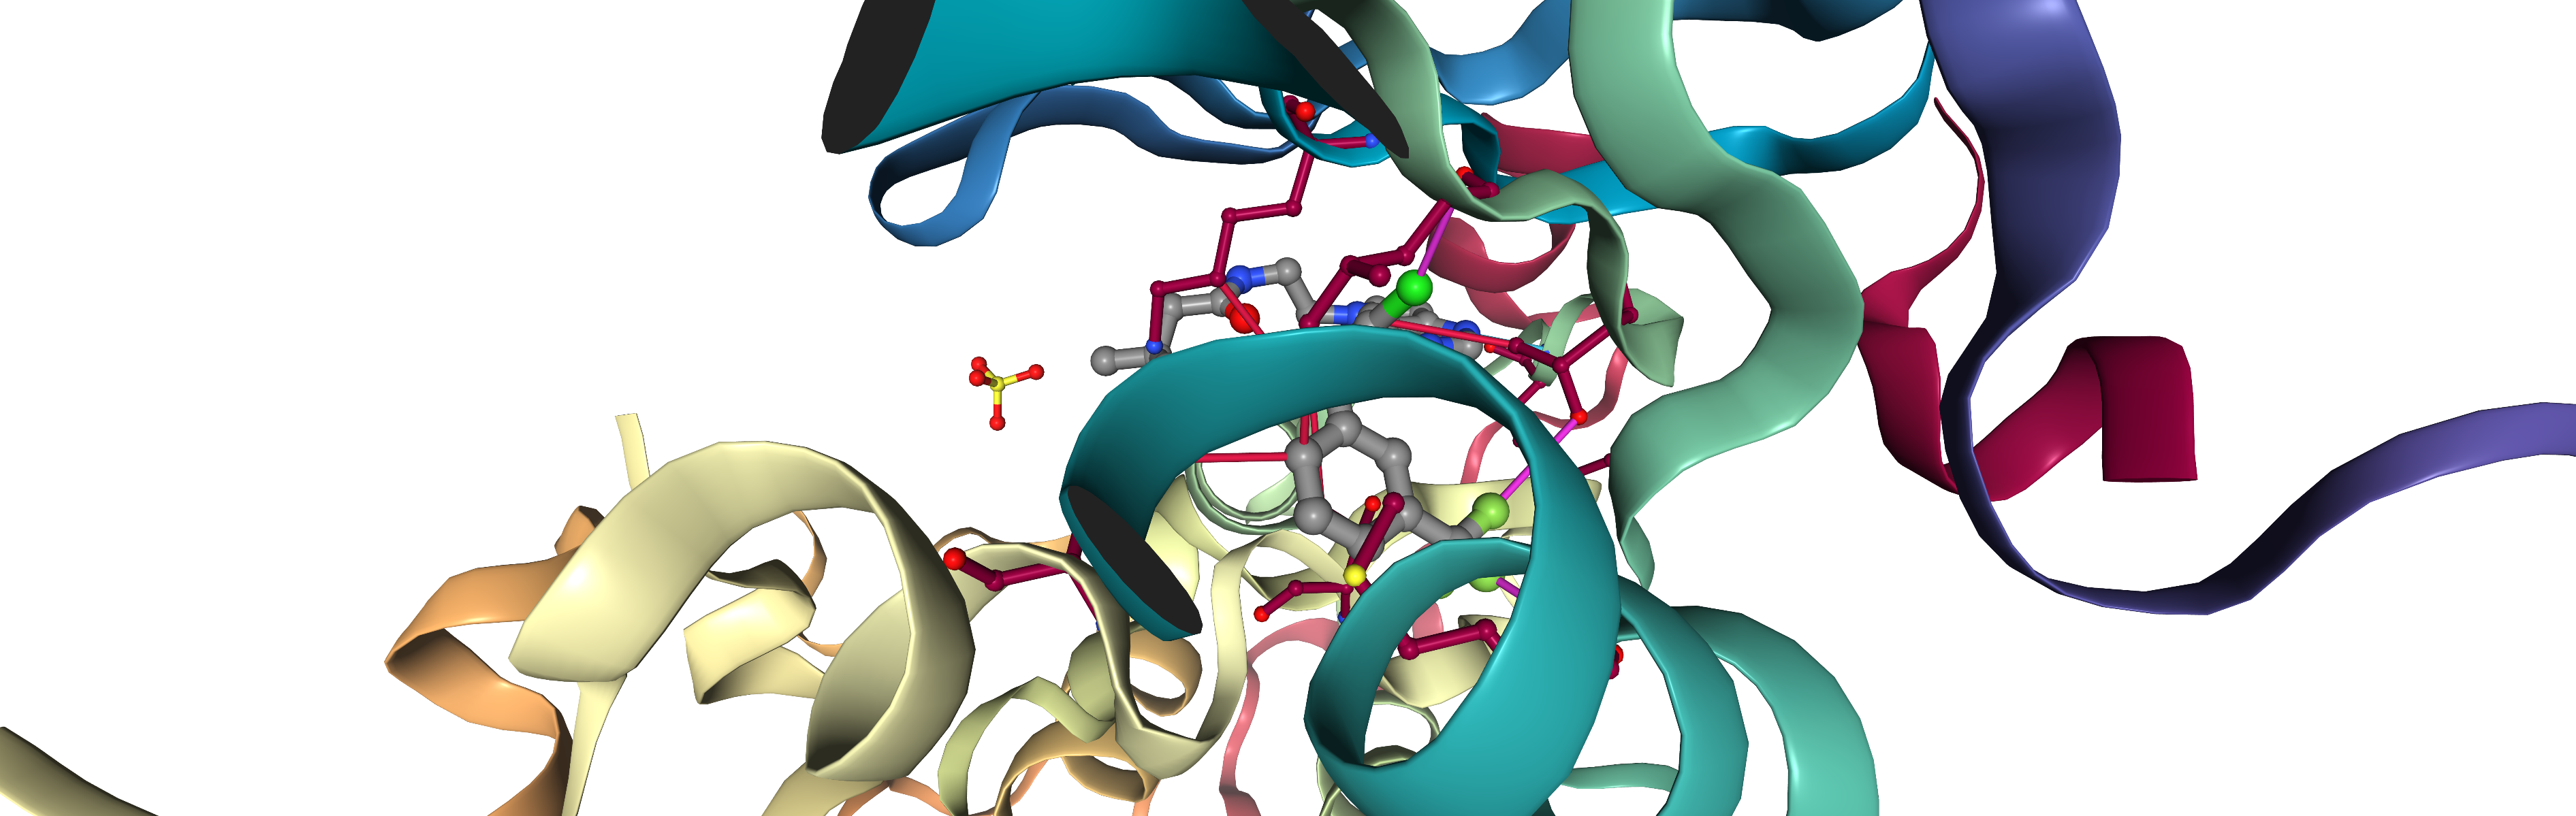

In [21]:
viewer_3D._display_image()

#### Analysis of interactions

As we can see in the NGL viewer, PLIP manages to identify different interactions between the protein and the ligand in the binding site, for example,

- the typical hinge hydrogen binding with a methionine residue, MET793, which is also identified in KLIFS, as shown on this [webpage](https://klifs.net/details.php?structure_id=7308). 
- hydrophobic interactions with the following residues:
    - LYS745
    - LEU788
    - THR790
    - THR854
    - LEU858  
- halogen interactions with residues
    - MET766
    - LEU788
    - THR790
    
All the identified interactions in NGLview do indeed correspond to the table of interactions generated above.

## Discussion

In this talktorial we have learned about protein-ligand interactions, more specifically in the context of the Protein–Ligand Interaction Profiler, or PLIP for short. We created a data frame to depict the interactions in a table. Furthermore, we made use of the NGL viewer to visualize these interactions in 3D, which require a good amount of web technologies, mainly based around the NGL viewer itself and `ipywidgets` layouts.

## Quiz

- Do some interactions seem more important than others?
- What's the main difference between hydrophobic interactions and hydrogen bonds? How are they similar?
- What can be a considerable advantage of using PLIP over KLIFS?